## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf

2024-07-28 22:45:30.798818: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 22:45:30.803786: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 22:45:30.821091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 22:45:30.849610: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 22:45:30.858274: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 22:45:30.879333: I tensorflow/core/platform/cpu_feature_gu

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Printing the version
print(tf.__version__)

2.17.0


## Q2. Load the Wine Quality dataset and explore its dimensions.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('wine.csv')

In [6]:
df.shape

(1599, 12)

## Q3. Check for null values, identify categorical variables, and encode them.

In [7]:
## Checking whether there is a null value in the data or not
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
## Encoding the categorical data
df['quality'] = np.where(df['quality'] == 'good',1,0)

In [9]:
df.quality.unique()

array([0, 1])

## Q4. Separate the features and target variables from the dataset.

In [10]:
x = df.drop('quality',axis=1)
y = df.quality

## Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [13]:
x_valid,x_train = x_train.iloc[:350,:],x_train.iloc[350:,:]
y_valid,y_train = y_train.iloc[:350],y_train[350:]

## Q6. Scale the dataset using an appropriate scaling technique.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [17]:
x_train.shape[1:]

(11,)

In [18]:
LAYERS = [
         tf.keras.layers.Dense(75,input_shape=x_train.shape[1:]),
         tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(50,activation='relu'),
         tf.keras.layers.Dropout(0.3),
         tf.keras.layers.Dense(30,activation='relu'),
         tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Dense(10,activation='relu'),
         tf.keras.layers.Dense(1,activation='sigmoid')
         ]

## Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [19]:
model = tf.keras.models.Sequential(LAYERS)

## Q9. Print the summary of the model architecture.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 75)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,551 (25.59 KB)

 Trainable params: 6,551 (25.59 KB)

 Non-trainable params: 0 (0.00 B)

## Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

## Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [23]:
MODEL = model.fit(x_train,y_train,validation_data = (x_valid,y_valid),batch_size=33,epochs=50)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8460 - loss: 0.3240 - val_accuracy: 0.5200 - val_loss: 23.1747
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 0.3262 - val_accuracy: 0.5143 - val_loss: 24.6239
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8683 - loss: 0.2882 - val_accuracy: 0.5200 - val_loss: 24.8101
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8660 - loss: 0.2895 - val_accuracy: 0.5114 - val_loss: 26.3106
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8338 - loss: 0.3491 - val_accuracy: 0.5200 - val_loss: 26.7817
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.3404 - val_accuracy: 0.5114 - val_loss: 27.6666
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3052 - val_accuracy: 0.5057 - val_loss: 27.2370
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.3840 - val_accuracy: 0.5029 - va

## Q13. Obtain the model's parameters (weights and biases).

In [25]:
model.trainable_weights

[<KerasVariable shape=(11, 75), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(75,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(75, 50), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(50,), dtype=float32, path=sequential/dense_1/bias>,
 <KerasVariable shape=(50, 30), dtype=float32, path=sequential/dense_2/kernel>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/dense_2/bias>,
 <KerasVariable shape=(30, 10), dtype=float32, path=sequential/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/dense_3/bias>,
 <KerasVariable shape=(10, 1), dtype=float32, path=sequential/dense_4/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential/dense_4/bias>]

In [27]:
model.non_trainable_weights

[]

## Q14. Store the model's training history as a Pandas DataFrame.

In [31]:
pd_history = pd.DataFrame(MODEL.history)

## Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<AxesSubplot: >

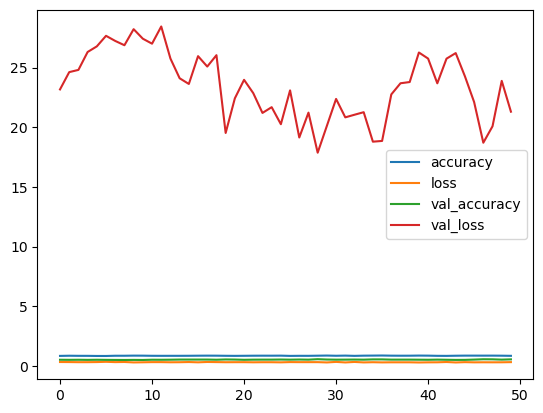

In [32]:
pd_history.plot()

## Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [33]:
model.evaluate(x_test,y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6980 - loss: 0.7590 


[0.648619532585144, 0.7329545617103577]